In [1]:
import numpy as np
import pandas as pd
import base64
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, LeavePOut, RepeatedStratifiedKFold, RepeatedKFold
from sklearn.preprocessing import LabelEncoder, minmax_scale, MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree, export_text
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional, Dropout, Activation, Flatten
from sklearn.metrics import (accuracy_score,confusion_matrix, ConfusionMatrixDisplay, r2_score, silhouette_score, 
balanced_accuracy_score,cohen_kappa_score, recall_score, precision_score, f1_score)
from kneed import knee_locator, KneeLocator
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("E:/Python Programs/EuroAstro/y1.csv")
df.head()

,Train_Test,Weekday,Date,Month,Year,Lagna,Lagna Padam,Sun,Sun Padam,Moon,...,Jupiter Padam,Venus,Venus Padam,Saturn,Saturn Padam,Rahu,Rahu Padam,Ketu,Ketu Padam,y1
0,Train,Tuesday,4,1,2022,10,3,20,3,22,...,1,21,1,22,3,3,3,17,1,18
1,Train,Friday,7,1,2022,10,3,20,4,25,...,1,20,4,22,3,3,3,17,1,2
2,Train,Tuesday,11,1,2022,10,4,21,1,2,...,1,20,3,22,3,3,3,17,1,4
3,Train,Friday,14,1,2022,11,1,21,2,5,...,1,20,3,22,3,3,3,17,1,6
4,Train,Tuesday,18,1,2022,11,2,21,3,8,...,2,20,2,22,3,3,3,17,1,3


In [3]:
encoding = LabelEncoder()
df["Weekday"] = encoding.fit_transform(df["Weekday"])
df["Year"] = encoding.fit_transform(df["Year"])

In [4]:
# 0 means Friday; 1 means Tuesday
# 0 means 2022; 1 means 2023; 2 means 2024

df.head()

,Train_Test,Weekday,Date,Month,Year,Lagna,Lagna Padam,Sun,Sun Padam,Moon,...,Jupiter Padam,Venus,Venus Padam,Saturn,Saturn Padam,Rahu,Rahu Padam,Ketu,Ketu Padam,y1
0,Train,1,4,1,0,10,3,20,3,22,...,1,21,1,22,3,3,3,17,1,18
1,Train,0,7,1,0,10,3,20,4,25,...,1,20,4,22,3,3,3,17,1,2
2,Train,1,11,1,0,10,4,21,1,2,...,1,20,3,22,3,3,3,17,1,4
3,Train,0,14,1,0,11,1,21,2,5,...,1,20,3,22,3,3,3,17,1,6
4,Train,1,18,1,0,11,2,21,3,8,...,2,20,2,22,3,3,3,17,1,3


In [5]:
df_train = df[df['Train_Test'] == 'Train']
df_test = df[df['Train_Test'] == 'Test']

In [6]:
df_train.head()

,Train_Test,Weekday,Date,Month,Year,Lagna,Lagna Padam,Sun,Sun Padam,Moon,...,Jupiter Padam,Venus,Venus Padam,Saturn,Saturn Padam,Rahu,Rahu Padam,Ketu,Ketu Padam,y1
0,Train,1,4,1,0,10,3,20,3,22,...,1,21,1,22,3,3,3,17,1,18
1,Train,0,7,1,0,10,3,20,4,25,...,1,20,4,22,3,3,3,17,1,2
2,Train,1,11,1,0,10,4,21,1,2,...,1,20,3,22,3,3,3,17,1,4
3,Train,0,14,1,0,11,1,21,2,5,...,1,20,3,22,3,3,3,17,1,6
4,Train,1,18,1,0,11,2,21,3,8,...,2,20,2,22,3,3,3,17,1,3


In [7]:
df_test.head()

,Train_Test,Weekday,Date,Month,Year,Lagna,Lagna Padam,Sun,Sun Padam,Moon,...,Jupiter Padam,Venus,Venus Padam,Saturn,Saturn Padam,Rahu,Rahu Padam,Ketu,Ketu Padam,y1
28,Test,1,12,4,0,14,4,27,4,10,...,3,24,3,23,2,3,1,16,3,21
85,Test,0,28,10,0,6,1,15,2,18,...,1,15,2,23,1,2,2,15,4,14
156,Test,1,4,7,1,19,1,6,4,21,...,1,9,4,24,2,1,2,14,4,14
174,Test,1,5,9,1,27,1,11,2,3,...,3,9,1,24,1,1,1,14,3,1
179,Test,0,22,9,1,2,4,12,3,19,...,3,9,3,24,1,1,1,14,3,3


In [8]:
df_train.reset_index(inplace=True, drop=True)
df_test.reset_index(inplace=True, drop=True)

In [9]:
df_train.drop(labels='Train_Test', axis=1, inplace=True)
df_test.drop(labels='Train_Test', axis=1, inplace=True)

In [10]:
X_train_notscaled, y_train = df_train[["Weekday","Date","Month","Year","Lagna","Lagna Padam","Sun","Sun Padam","Moon","Moon Padam","Mars","Mars Padam","Mercury","Mercury Padam","Jupiter","Jupiter Padam","Venus","Venus Padam","Saturn","Saturn Padam","Rahu","Rahu Padam","Ketu","Ketu Padam"]], df_train["y1"]
X_train_notscaled.shape, y_train.shape

((221, 24), (221,))

In [11]:
X_test_notscaled, y_test = df_test[["Weekday","Date","Month","Year","Lagna","Lagna Padam","Sun","Sun Padam","Moon","Moon Padam","Mars","Mars Padam","Mercury","Mercury Padam","Jupiter","Jupiter Padam","Venus","Venus Padam","Saturn","Saturn Padam","Rahu","Rahu Padam","Ketu","Ketu Padam"]], df_test["y1"]
X_test_notscaled.shape, y_test.shape

((45, 24), (45,))

In [13]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_notscaled)
X_train_scaled

array([[ 1.00453517, -1.32195096, -1.43581585, ...,  0.4786849 ,
         1.99911362, -1.31257075],
       [-0.9954853 , -0.97566353, -1.43581585, ...,  0.4786849 ,
         1.99911362, -1.31257075],
       [ 1.00453517, -0.51394696, -1.43581585, ...,  0.4786849 ,
         1.99911362, -1.31257075],
       ...,
       [ 1.00453517, -0.97566353, -0.28716317, ..., -1.36113011,
        -2.11069206,  0.42964027],
       [-0.9954853 ,  0.17862791, -0.28716317, ..., -1.36113011,
        -2.11069206,  0.42964027],
       [ 1.00453517,  1.10206105,  0.        , ..., -1.36113011,
        -2.11069206,  0.42964027]])

In [14]:
X_test_scaled = scaler.fit_transform(X_test_notscaled)
X_test_scaled

array([[ 0.97801929, -0.46726167, -0.62878621, ..., -0.93700636,
         4.02254286,  0.11720181],
       [-1.02247472,  1.27589068,  1.57604856, ..., -0.03987261,
         2.47541099,  1.17201808],
       [ 0.97801929, -1.33883785,  0.47363117, ..., -0.03987261,
         0.92827912,  1.17201808],
       ...,
       [-1.02247472, -0.46726167,  0.47363117, ...,  1.75439489,
        -0.61885275, -0.93761446],
       [ 0.97801929, -0.03147358,  0.47363117, ...,  1.75439489,
        -0.61885275, -0.93761446],
       [-1.02247472,  0.29536748,  0.47363117, ...,  1.75439489,
        -0.61885275, -0.93761446]])

In [14]:
model = LogisticRegression()
model.fit(X_train_notscaled, y_train)

LogisticRegression()

In [15]:
model.score(X_test_notscaled, y_test)

0.17777777777777778

In [16]:
w, b = model.coef_, model.intercept_
w, b

(array([[ 0.06352216,  0.11327606, -0.88760451,  0.05729696,  0.01404927,
          0.31424432, -0.128101  ,  0.01168025, -0.12626705,  0.10025555,
          0.24913025, -0.21016112, -0.14096985],
        [ 0.00518892,  0.24170906,  0.58919369,  0.05062131, -0.07300779,
          0.20343083,  0.12577656,  0.04111427,  0.14222211,  0.13648344,
         -0.132113  , -0.13875866, -0.19414744],
        [ 0.01732069,  0.13803403, -0.70042317,  0.10252186, -0.0060044 ,
          0.10372436,  0.56594427, -0.02257516,  0.15132089,  0.09927042,
         -0.0335981 , -0.06491209, -0.25861854],
        [ 0.01255203,  0.10478388,  0.42584158,  0.04199802,  0.12497587,
         -0.13957867, -0.01632192,  0.0376028 ,  0.15269253,  0.08840043,
          0.29182733,  0.14261571,  0.03344583],
        [ 0.08684552, -0.02398796, -0.1156831 ,  0.05492598,  0.26255115,
          0.2295549 ,  0.72440986, -0.03769218, -0.27310375,  0.09132725,
          0.04272667, -0.1953474 , -0.27699919],
        [ 0.016

In [17]:
model.predict(X_test_notscaled)

array([10, 21, 13, 15,  8,  8,  8,  8,  2,  2,  2,  5,  8,  2, 13,  2, 13,
        7,  8,  5,  2,  8, 22, 14,  6,  6, 13,  2,  2,  2,  2,  2, 25,  7,
        7, 14, 14, 15, 14, 13,  4,  2,  4, 14, 14], dtype=int64)

In [18]:
y_test.values

array([21, 14, 14,  1,  3, 18,  5, 12, 17, 10, 10,  5,  8,  3,  4,  8,  1,
        7,  8, 16,  1, 19, 10,  2, 13,  6, 13,  2, 11,  9, 16,  4,  6, 15,
        7,  2,  3,  3, 10,  2, 11,  6, 12,  2, 15], dtype=int64)

In [19]:
model.score(X_test_notscaled,y_test)

0.17777777777777778

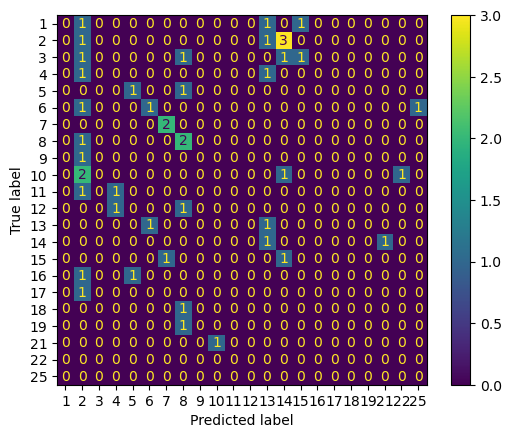

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test, model.predict(X_test_notscaled))
plt.show()

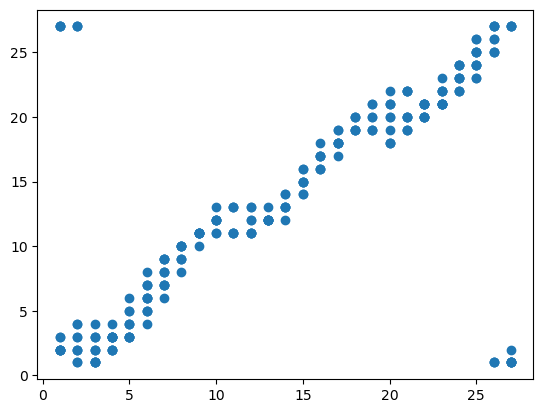

In [29]:
plt.scatter("Sun","Mercury",data= df)
plt.show()

In [22]:
X_train_notscaled.corr().round(2)

,Date,Month,Year,Lagna,Lagna Padam,Sun,Sun Padam,Moon,Moon Padam,Mars,Mars Padam,Mercury,Mercury Padam
Date,1.00,0.01,-0.02,-0.00,0.00,-0.08,-0.05,-0.05,-0.01,-0.04,-0.06,-0.05,-0.04
Month,0.01,1.00,-0.27,-0.18,0.05,-0.29,0.01,0.03,-0.04,-0.29,0.00,-0.18,-0.02
Year,-0.02,-0.27,1.00,-0.02,-0.02,0.13,-0.03,-0.01,-0.11,0.13,-0.04,0.11,0.09
Lagna,-0.00,-0.18,-0.02,1.00,0.06,-0.38,0.05,0.02,0.01,-0.03,0.06,-0.34,0.01
Lagna Padam,0.00,0.05,-0.02,0.06,1.00,-0.05,-0.12,0.01,-0.00,-0.08,0.01,-0.09,-0.04
Sun,-0.08,-0.29,0.13,-0.38,-0.05,1.00,0.00,0.01,0.04,0.04,-0.11,0.76,-0.02
Sun Padam,-0.05,0.01,-0.03,0.05,-0.12,0.00,1.00,0.07,-0.04,-0.03,-0.04,0.00,0.02
Moon,-0.05,0.03,-0.01,0.02,0.01,0.01,0.07,1.00,-0.04,0.01,-0.04,-0.01,-0.08
Moon Padam,-0.01,-0.04,-0.11,0.01,-0.00,0.04,-0.04,-0.04,1.00,0.02,0.04,0.00,0.07
Mars,-0.04,-0.29,0.13,-0.03,-0.08,0.04,-0.03,0.01,0.02,1.00,-0.04,0.06,0.10


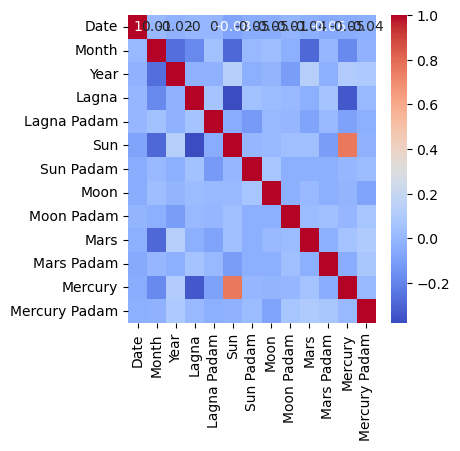

In [23]:
plt.figure(figsize=(4,4))
correlation = X_train_notscaled.corr().round(2)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [24]:
# with the following functions we can select highly correlated features.
# It will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()   # Set of all the names of correlated columns (i.e., duplicates not allowed)
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:   # If we are intrested in absolute coeff value
                colname = corr_matrix.columns[i]   # getting the name of the column
                col_corr.add(colname)
    return col_corr

In [25]:
corr_features = correlation(X_train_notscaled, 0.2)
len(set(corr_features))

4

In [26]:
corr_features

{'Mars', 'Mercury', 'Sun', 'Year'}